## Summary

This projects explores the crypto-currency-market using the <a href="https://coinmarketcap.com">API of coinmarket</a>
and focuses on market capitalization and volatitility.

## Import packages

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

## Import data

In [2]:
current_coin = pd.read_json("https://api.coinmarketcap.com/v1/ticker/")

In [3]:
# If going for reproducibility 
current_coin.to_csv("current_coin", sep=',', encoding='utf-8')

## Explore & clean the data

In [4]:
current_coin.shape

(100, 15)

In [5]:
current_coin.columns

Index(['24h_volume_usd', 'available_supply', 'id', 'last_updated',
       'market_cap_usd', 'max_supply', 'name', 'percent_change_1h',
       'percent_change_24h', 'percent_change_7d', 'price_btc', 'price_usd',
       'rank', 'symbol', 'total_supply'],
      dtype='object')

In [6]:
current_coin.index

RangeIndex(start=0, stop=100, step=1)

In [7]:
current_coin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
24h_volume_usd        100 non-null float64
available_supply      100 non-null int64
id                    100 non-null object
last_updated          100 non-null int64
market_cap_usd        100 non-null int64
max_supply            33 non-null float64
name                  100 non-null object
percent_change_1h     100 non-null float64
percent_change_24h    100 non-null float64
percent_change_7d     100 non-null float64
price_btc             100 non-null float64
price_usd             100 non-null float64
rank                  100 non-null int64
symbol                100 non-null object
total_supply          100 non-null int64
dtypes: float64(7), int64(5), object(3)
memory usage: 11.8+ KB


In [8]:
current_coin.describe()

,24h_volume_usd,available_supply,last_updated,market_cap_usd,max_supply,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,total_supply
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,3.300000e+01,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,1.000000e+02
mean,6.937778e+08,1.327601e+10,1.559570e+09,2.619185e+09,1.214162e+10,-0.639800,-2.016800,4.702700,1.456746e-02,123.778346,50.500000,2.576883e+10
std,3.001543e+09,4.117282e+10,4.365834e+00,1.538772e+10,3.638793e+10,0.696138,4.656463,21.245095,1.012120e-01,860.836923,29.011492,1.067247e+11
min,1.030262e+05,8.668600e+04,1.559570e+09,5.840884e+07,1.000000e+06,-2.570000,-9.600000,-15.250000,1.200000e-07,0.000992,1.000000,1.000000e+05
25%,4.108392e+06,6.554726e+07,1.559570e+09,9.457032e+07,8.400000e+07,-1.070000,-3.907500,-4.865000,9.307500e-06,0.078902,25.750000,9.993113e+07
50%,2.101416e+07,3.421574e+08,1.559570e+09,1.774038e+08,2.000000e+08,-0.655000,-2.820000,-0.780000,9.270000e-05,0.785776,50.500000,4.685012e+08
75%,9.321314e+07,1.917515e+09,1.559570e+09,4.605674e+08,1.000000e+09,-0.380000,-1.192500,7.662500,3.781700e-04,3.205613,75.250000,3.522407e+09
max,2.036243e+10,2.375506e+11,1.559570e+09,1.508820e+11,1.844700e+11,2.030000,24.610000,153.990000,1.000000e+00,8506.115060,100.000000,9.900000e+11


In [9]:
current_coin.head()

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,2.036243e+10,17738062,bitcoin,1559570190,150881996310,2.100000e+07,Bitcoin,-0.58,-2.57,-2.89,1.000000,8506.115060,1,BTC,17738062
1,8.862492e+09,106337344,ethereum,1559570242,27951621202,NaN,Ethereum,-0.56,-2.71,-2.24,0.031009,262.857996,2,ETH,106337344
2,2.321487e+09,42181995112,ripple,1559570225,18672945928,1.000000e+11,XRP,-1.12,0.36,6.49,0.000052,0.442676,3,XRP,99991617212
3,1.779191e+09,17817688,bitcoin-cash,1559570225,7657254225,2.100000e+07,Bitcoin Cash,-0.27,-3.39,-1.26,0.050698,429.755782,4,BCH,17817688
4,3.918325e+09,62060076,litecoin,1559570225,6950500679,8.400000e+07,Litecoin,-0.76,-2.47,-2.22,0.013212,111.996328,5,LTC,62060076


In [10]:
current_coin.tail()

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
95,3.861742e+07,942467259,loopring,1559570222,62367509,NaN,Loopring,-0.38,-1.86,-6.02,0.000008,0.066175,96,LRC,1375076043
96,2.300864e+07,380104462,latoken,1559570222,62332257,1.000000e+09,LATOKEN,-0.58,-3.52,7.65,0.000019,0.163987,97,LA,400000000
97,1.215651e+06,484450000,revain,1559570223,59870651,4.844500e+08,Revain,-1.64,-4.63,-6.09,0.000015,0.123585,98,R,484450000
98,2.029104e+07,1050141509,decentraland,1559570222,59202912,NaN,Decentraland,-1.02,-3.24,-9.20,0.000007,0.056376,99,MANA,2644403343
99,8.377418e+06,1635091511,orbs,1559570227,58408839,NaN,Orbs,-0.63,0.45,-4.91,0.000004,0.035722,100,ORBS,10000000000


In [11]:
current_coin.isnull().sum()

24h_volume_usd         0
available_supply       0
id                     0
last_updated           0
market_cap_usd         0
max_supply            67
name                   0
percent_change_1h      0
percent_change_24h     0
percent_change_7d      0
price_btc              0
price_usd              0
rank                   0
symbol                 0
total_supply           0
dtype: int64

In [12]:
# Drop max_supply because it is not necessary here
current_coin=current_coin.drop("max_supply", axis=1).copy()
current_coin.columns

Index(['24h_volume_usd', 'available_supply', 'id', 'last_updated',
       'market_cap_usd', 'name', 'percent_change_1h', 'percent_change_24h',
       'percent_change_7d', 'price_btc', 'price_usd', 'rank', 'symbol',
       'total_supply'],
      dtype='object')

In [13]:
current_coin_2 = current_coin.loc[:, ['id', 'market_cap_usd']]
current_coin_2.head()

,id,market_cap_usd
0,bitcoin,150881996310
1,ethereum,27951621202
2,ripple,18672945928
3,bitcoin-cash,7657254225
4,litecoin,6950500679


In [14]:
current_coin_2.count()

id                100
market_cap_usd    100
dtype: int64

In [15]:
market_capitalization_above_0 = current_coin_2.query("market_cap_usd > 0" )
current_coin_cap = market_capitalization_above_0
current_coin_cap.count()

id                100
market_cap_usd    100
dtype: int64

In [16]:
total_market_cap = current_coin_cap['market_cap_usd'].sum()
total_market_cap

261918503689

In [17]:
# coins with lowest market capitalization
ten_lowest_caps =current_coin_cap.sort_values(by="market_cap_usd")[0:10].reset_index().drop("index", axis=1)
ten_lowest_caps['%_total_cap'] = (ten_lowest_caps["market_cap_usd"]/total_market_cap)*100
ten_lowest_caps

,id,market_cap_usd,%_total_cap
0,orbs,58408839,0.022300
1,decentraland,59202912,0.022604
2,revain,59870651,0.022859
3,latoken,62332257,0.023798
4,loopring,62367509,0.023812
5,loom-network,62636183,0.023914
6,nash-exchange,64093001,0.024471
7,ark,67546569,0.025789
8,gxchain,67738063,0.025862
9,digixdao,69793436,0.026647


### Coins with 5 lowest market cap

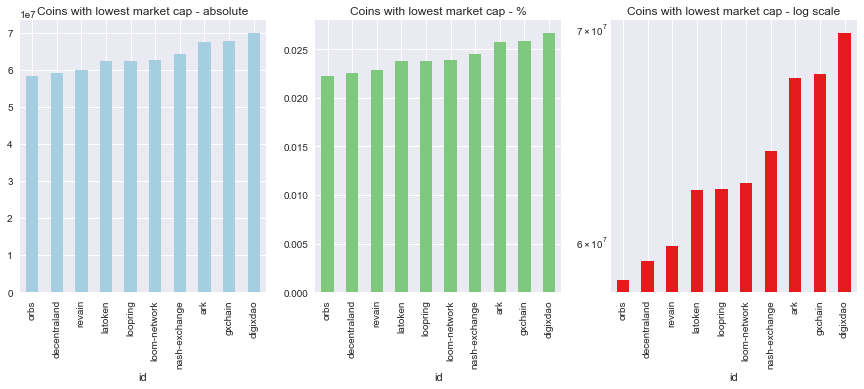

In [18]:
fig = plt.figure()

ax_1 = fig.add_subplot(131)

ten_lowest_caps.plot(x="id", y='market_cap_usd', kind="bar", legend=False, title="Coins with lowest market cap - absolute", 
                     colormap="Paired", figsize=(15,5),ax=ax_1)
ax_2 = fig.add_subplot(132)

ten_lowest_caps.plot(x="id", y='%_total_cap', kind="bar", legend=False, title="Coins with lowest market cap - %", 
                     colormap="Accent", figsize=(15,5),ax=ax_2)

ax_3 = fig.add_subplot(133)
ten_lowest_caps.plot(x="id", y='market_cap_usd', kind="bar", legend=False, title="Coins with lowest market cap - log scale",  
                     colormap="Set1", figsize=(15,5), logy=True, ax=ax_3)

plt.show()

In [19]:
top_ten_caps =current_coin_cap.sort_values(by="market_cap_usd", ascending= False)[0:10].reset_index().drop("index", axis=1)
top_ten_caps['%_total_cap'] = (top_ten_caps["market_cap_usd"]/total_market_cap)*100
top_ten_caps

,id,market_cap_usd,%_total_cap
0,bitcoin,150881996310,57.606467
1,ethereum,27951621202,10.671877
2,ripple,18672945928,7.129296
3,bitcoin-cash,7657254225,2.923525
4,litecoin,6950500679,2.653688
5,eos,6726520327,2.568173
6,binance-coin,4547254189,1.736133
7,bitcoin-sv,3925904470,1.498903
8,tether,3140437984,1.199013
9,stellar,2580710877,0.985311


### Coins with 5 highest market cap

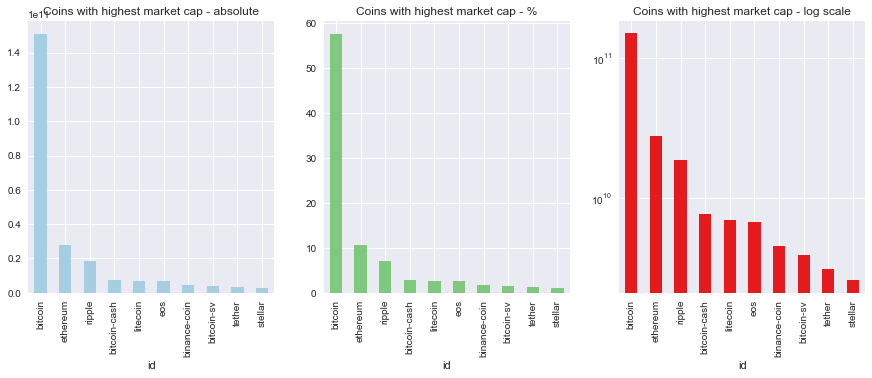

In [20]:
fig = plt.figure()

ax_1 = fig.add_subplot(131)

top_ten_caps.plot(x="id", y='market_cap_usd', kind="bar", legend=False, title="Coins with highest market cap - absolute", 
                     colormap="Paired", figsize=(15,5),ax=ax_1)
ax_2 = fig.add_subplot(132)

top_ten_caps.plot(x="id", y='%_total_cap', kind="bar", legend=False, title="Coins with highest market cap - %", 
                     colormap="Accent", figsize=(15,5),ax=ax_2)

ax_3 = fig.add_subplot(133)
top_ten_caps.plot(x="id", y='market_cap_usd', kind="bar", legend=False, title="Coins with highest market cap - log scale",  
                     colormap="Set1", figsize=(15,5), logy=True, ax=ax_3)

plt.show()

Bitcoin has the highest market share, followed by ethereum.

In [21]:
# volatility
value_change = current_coin.loc[:, ['id', 'percent_change_24h', 'percent_change_7d']].set_index('id')
value_change.isnull().sum()

percent_change_24h    0
percent_change_7d     0
dtype: int64

In [22]:
value_change_24 = value_change.sort_values(by="percent_change_24h", ascending=True)
value_change_7 = value_change.sort_values(by="percent_change_7d", ascending=True)

In [23]:
top_five_decrease_24 = value_change_24.iloc[0:5,0]
top_five_decrease_24

id
aion         -9.60
tron         -8.35
monacoin     -7.74
bittorrent   -6.75
tezos        -6.45
Name: percent_change_24h, dtype: float64

Coins with the highest negative change or decrease in value.

In [24]:
top_five_increase_24 = value_change_24.iloc[-6:-1,0]
top_five_increase_24

id
ethereum-classic     3.44
aurora               4.39
cosmos              12.43
bitcoin-sv          15.53
metaverse           15.64
Name: percent_change_24h, dtype: float64

Coins with the highest positive change or increase in value.

In [25]:
top_five_decrease_7 = value_change_7.iloc[0:5,1]
top_five_decrease_7

id
chainlink      -15.25
aelf           -13.70
maidsafecoin   -13.06
tezos          -12.44
mixin          -12.32
Name: percent_change_7d, dtype: float64

In [26]:
top_five_increase_7 = value_change_7.iloc[-6:-1,1]
top_five_increase_7

id
metaverse        33.88
ravencoin        35.37
cosmos           43.72
maximine-coin    61.42
bitcoin-sv       89.55
Name: percent_change_7d, dtype: float64

###  Data visualization of changes in coin value over 24 hours and 7 days.

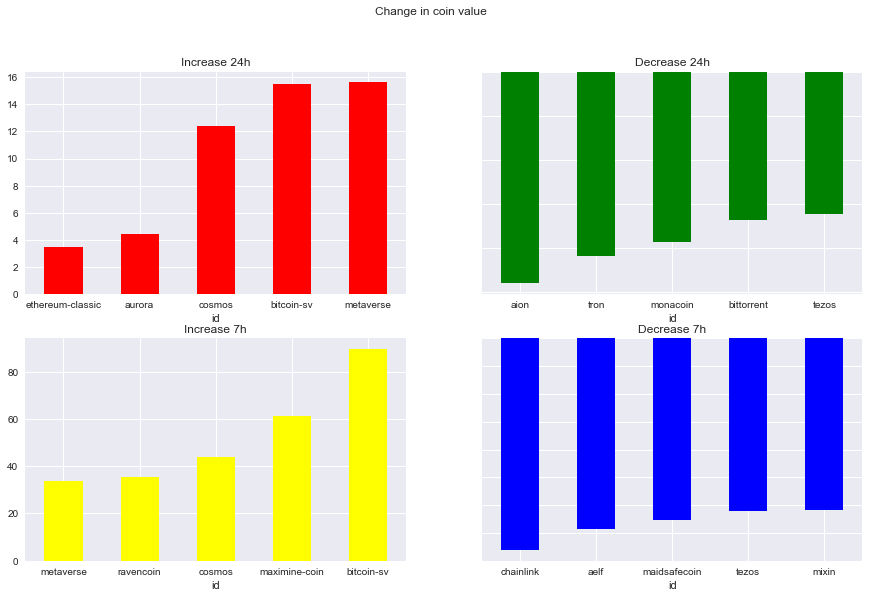

In [27]:
fig = plt.figure(figsize=(15,9))
fig.suptitle("Change in coin value")
fig.tight_layout(pad=1, w_pad=0.5, h_pad=1.0)
ax1=fig.add_subplot(221)
top_five_increase_24.plot(kind="bar", color="red", ax=ax1, sharey=True, title="Increase 24h", rot=0)
ax2=fig.add_subplot(222)
top_five_decrease_24.plot(kind="bar", color="green", ax=ax2, sharey=True, title="Decrease 24h", rot=0)
ax3=fig.add_subplot(223)
top_five_increase_7.plot(kind="bar", color="yellow", ax=ax3, sharey=True, title="Increase 7h", rot=0)
ax3=fig.add_subplot(224)
top_five_decrease_7.plot(kind="bar", color="blue", ax=ax3, sharey=True,  title="Decrease 7h", rot=0)

plt.show()

### Coins with a market cap greater than 5 billion

In [28]:
# Selecting everything bigger than 5 billion 
big_coins = current_coin.query('market_cap_usd > 5000000000')

# Printing out largecaps
big_coins



,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,2.036243e+10,17738062,bitcoin,1559570190,150881996310,Bitcoin,-0.58,-2.57,-2.89,1.000000,8506.115060,1,BTC,17738062
1,8.862492e+09,106337344,ethereum,1559570242,27951621202,Ethereum,-0.56,-2.71,-2.24,0.031009,262.857996,2,ETH,106337344
2,2.321487e+09,42181995112,ripple,1559570225,18672945928,XRP,-1.12,0.36,6.49,0.000052,0.442676,3,XRP,99991617212
3,1.779191e+09,17817688,bitcoin-cash,1559570225,7657254225,Bitcoin Cash,-0.27,-3.39,-1.26,0.050698,429.755782,4,BCH,17817688
4,3.918325e+09,62060076,litecoin,1559570225,6950500679,Litecoin,-0.76,-2.47,-2.22,0.013212,111.996328,5,LTC,62060076
5,3.566270e+09,917587135,eos,1559570224,6726520327,EOS,-0.74,-6.01,1.22,0.000865,7.330661,6,EOS,1014287141


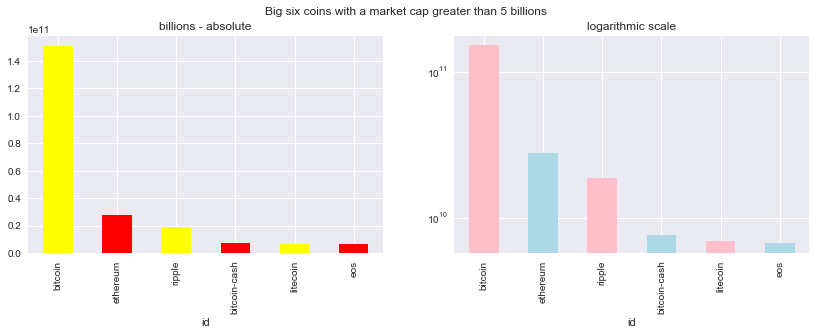

In [29]:
fig=plt.figure(figsize=(14,4))
fig.tight_layout()
fig.suptitle("Big six coins with a market cap greater than 5 billions")
ax1 =fig.add_subplot(121)
big_coins.plot(x="id", y="market_cap_usd", kind="bar", legend=False, color=["yellow", "red"], ax=ax1,
               title="billions - absolute")
ax2=fig.add_subplot(122)
big_coins.plot(x="id", y="market_cap_usd", kind="bar", legend=False, color=["pink", "lightblue"], logy=True, ax=ax2,
               title="logarithmic scale")
plt.show()

###  T-shirt sizes: L, M, S of coins

In [30]:
print(current_coin['market_cap_usd'].max())
print(current_coin['market_cap_usd'].min())

150881996310
58408839


In [31]:
current_coin['market_cap_label'] = "T-Shirt-Size"

In [32]:
marketcap = current_coin['market_cap_usd'] 
current_coin['market_cap_label'] = "T-Shirt-Size"

for i,value in enumerate(marketcap):
    # greater than five hundred million
    if value >= 900000000:  
        current_coin.loc[i, 'market_cap_label'] = "L"
    elif value >= 90000000 and value  < 900000000:
        current_coin.loc[i, 'market_cap_label'] = "M"
    elif value < 90000000:
        current_coin.loc[i, 'market_cap_label'] = "S"
        

In [33]:
current_coin.loc[0:5,'market_cap_label']

0    L
1    L
2    L
3    L
4    L
5    L
Name: market_cap_label, dtype: object

In [34]:
# current_coin.columns
coins_tshirt_labels=current_coin[['id', 'market_cap_usd', 'market_cap_label']]
print(coins_tshirt_labels['market_cap_label'].value_counts())
coins_tshirt_labels.head()


M    59
S    23
L    18
Name: market_cap_label, dtype: int64


,id,market_cap_usd,market_cap_label
0,bitcoin,150881996310,L
1,ethereum,27951621202,L
2,ripple,18672945928,L
3,bitcoin-cash,7657254225,L
4,litecoin,6950500679,L


According to the above definition 18 are large, and 61 are medium and 21 small.

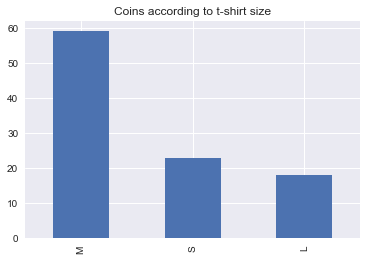

In [35]:
coins_tshirt_labels['market_cap_label'].value_counts().plot(kind="bar", title="Coins according to t-shirt size")